In [17]:
import yfinance as yf
import pandas as pd
import numpy as np

# Wygeneruj listy 100 spolek z najlepszych wynikow za 12 miesiecy do 1 marca (50) z nich 30 najlepszych z ostatnich 6 miesiecy i top 10 z 3 miesiecy
oblicz wyniki porfela
wygeneruj benchmark losoo wybrane 10 spolek

# 01-03-2024 - 01.03-2025

In [18]:
dfs = pd.read_html("https://en.wikipedia.org/wiki/Nasdaq-100")
for df in dfs:
    if "Ticker" in df.columns:
        ticker_names = df["Ticker"].tolist()
        break
    elif "Ticker symbol" in df.columns:
        ticker_names = df["Ticker symbol"].tolist()
        break

print(ticker_names)
print("Number of tickers:", len(ticker_names))

['ADBE', 'AMD', 'ABNB', 'GOOGL', 'GOOG', 'AMZN', 'AEP', 'AMGN', 'ADI', 'ANSS', 'AAPL', 'AMAT', 'APP', 'ARM', 'ASML', 'AZN', 'TEAM', 'ADSK', 'ADP', 'AXON', 'BKR', 'BIIB', 'BKNG', 'AVGO', 'CDNS', 'CDW', 'CHTR', 'CTAS', 'CSCO', 'CCEP', 'CTSH', 'CMCSA', 'CEG', 'CPRT', 'CSGP', 'COST', 'CRWD', 'CSX', 'DDOG', 'DXCM', 'FANG', 'DASH', 'EA', 'EXC', 'FAST', 'FTNT', 'GEHC', 'GILD', 'GFS', 'HON', 'IDXX', 'INTC', 'INTU', 'ISRG', 'KDP', 'KLAC', 'KHC', 'LRCX', 'LIN', 'LULU', 'MAR', 'MRVL', 'MELI', 'META', 'MCHP', 'MU', 'MSFT', 'MSTR', 'MDLZ', 'MDB', 'MNST', 'NFLX', 'NVDA', 'NXPI', 'ORLY', 'ODFL', 'ON', 'PCAR', 'PLTR', 'PANW', 'PAYX', 'PYPL', 'PDD', 'PEP', 'QCOM', 'REGN', 'ROP', 'ROST', 'SBUX', 'SNPS', 'TTWO', 'TMUS', 'TSLA', 'TXN', 'TTD', 'VRSK', 'VRTX', 'WBD', 'WDAY', 'XEL', 'ZS']
Number of tickers: 101


In [19]:
def get_company_data(ticker_name, start_date="2022-01-01", end_date="2023-01-01"):

    ticker = yf.Ticker(ticker_name)
    data = ticker.history(start=start_date, end=end_date)

    # uzyc pandas resample
    # ptc_change

    # przesorotwac od najwyzszych i wziac 50 najlepszych
    # porfel kazda spolka ma 10%  x= [0.1, 0.1, 0.1,... 0.1, 0.1]
    # tworzymy dzienna stope zwrotu ze spolek ktore otrzmalismy i patrzymy na wyniki porfela
    return data


def get_avg_porfolio_returns(data: pd.DataFrame):

    data = data.resample("ME").ffill()
    daily_returns = data["Close"].pct_change().fillna(0)
    returns = daily_returns.mean()
    return returns


def get_best_n(ticker_names: list[str], best_n: int, start_date="2022-01-01", end_date="2023-01-01") -> list[str]:
    data = []
    for ticker in ticker_names:
        try:
            data.append(
                {
                    "ticker_name": ticker,
                    "returns": get_avg_porfolio_returns(get_company_data(ticker, start_date, end_date)),
                }
            )
        except Exception as e:
            # print(f"Error fetching data for {ticker}: {e}")
            continue

    data = pd.DataFrame(data)
    data = data.sort_values(by="returns", ascending=True)
    data = data.head(best_n)
    best_tickers = data["ticker_name"].tolist()
    return best_tickers


data = get_company_data("LIN", start_date="2022-01-01", end_date="2023-01-01")

x = get_avg_porfolio_returns(data)
x

0.005950607725097108

In [20]:
best_tickers_12m = get_best_n(ticker_names[:100], 50, start_date="2024-03-01", end_date="2025-03-01")
best_tickers_6m = get_best_n(best_tickers_12m, 30, start_date="2024-09-01", end_date="2025-03-01")
best_tickers_3m = get_best_n(best_tickers_6m, 10, start_date="2024-12-01", end_date="2025-03-01")

Momentum Strategy Tickers: ['TTD', 'ON', 'AMD', 'CDNS', 'PYPL', 'EA', 'BIIB', 'ROST', 'MSFT', 'SNPS']
Benchmark Tickers: ['FAST' 'CDW' 'LULU' 'WDAY' 'ADBE' 'CCEP' 'EXC' 'NFLX' 'AMAT' 'GFS']

Performance from 2025-03-01 to 2025-04-28:
Total Return: -1.63%
Benchmark Total Return: -2.83%
Annualized Return: -10.05%
Benchmark Annualized Return: -16.94%
Sharpe Ratio: 0.02
Benchmark Sharpe Ratio: -0.33


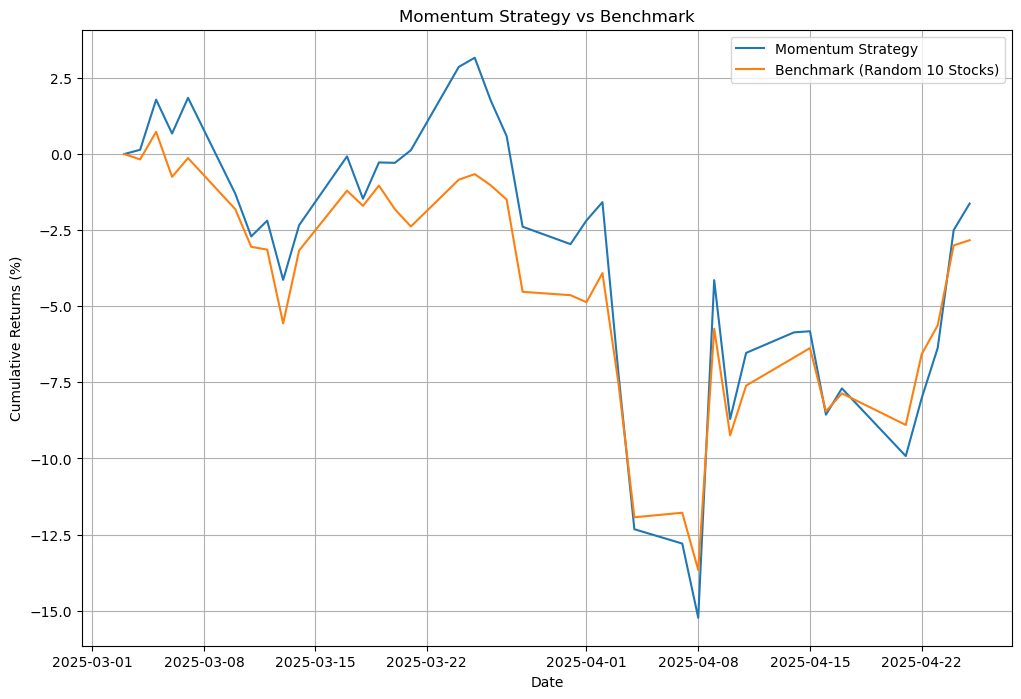

In [21]:
# Create momentum trading strategy for best_tickers_3m with equal weights
# Check performance from 2025-03-01 to now

# Define start and end dates
end_date = pd.Timestamp.now().strftime("%Y-%m-%d")
start_date = "2025-03-01"

# Initialize portfolio dataframe to store daily values
portfolio_data = pd.DataFrame()

# Get data for each ticker in our portfolio
for ticker in best_tickers_3m:
    try:
        # Fetch historical data
        stock_data = yf.Ticker(ticker).history(start=start_date, end=end_date)

        if not stock_data.empty:
            # Add adjusted close to our portfolio dataframe
            portfolio_data[ticker] = stock_data["Close"]
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# Forward fill missing values
portfolio_data = portfolio_data.ffill().bfill()

# Calculate daily returns
daily_returns = portfolio_data.pct_change().fillna(0)

# Equal weights for all stocks (10% each for 10 stocks)
weights = np.array([0.1] * len(best_tickers_3m))

# Calculate portfolio returns
portfolio_returns = daily_returns.dot(weights)

# Calculate cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod() - 1

# Create benchmark (random 10 stocks from NASDAQ-100)
np.random.seed(42)  # For reproducibility
benchmark_tickers = np.random.choice([t for t in ticker_names if t not in best_tickers_3m], 10, replace=False)

# Get benchmark data
benchmark_data = pd.DataFrame()
for ticker in benchmark_tickers:
    try:
        stock_data = yf.Ticker(ticker).history(start=start_date, end=end_date)
        if not stock_data.empty:
            benchmark_data[ticker] = stock_data["Close"]
    except Exception as e:
        print(f"Error fetching data for benchmark {ticker}: {e}")

# Forward fill missing values for benchmark
benchmark_data = benchmark_data.ffill().bfill()

# Calculate benchmark returns
benchmark_returns = benchmark_data.pct_change().fillna(0)
benchmark_portfolio_returns = benchmark_returns.dot(np.array([0.1] * len(benchmark_tickers)))
benchmark_cumulative_returns = (1 + benchmark_portfolio_returns).cumprod() - 1

# Calculate performance metrics
total_return = cumulative_returns.iloc[-1] if len(cumulative_returns) > 0 else 0
benchmark_total_return = benchmark_cumulative_returns.iloc[-1] if len(benchmark_cumulative_returns) > 0 else 0
annualized_return = (1 + total_return) ** (252 / len(cumulative_returns)) - 1 if len(cumulative_returns) > 0 else 0
benchmark_annualized_return = (
    (1 + benchmark_total_return) ** (252 / len(benchmark_cumulative_returns)) - 1
    if len(benchmark_cumulative_returns) > 0
    else 0
)
sharpe_ratio = portfolio_returns.mean() / portfolio_returns.std() * np.sqrt(252) if portfolio_returns.std() != 0 else 0
benchmark_sharpe_ratio = (
    benchmark_portfolio_returns.mean() / benchmark_portfolio_returns.std() * np.sqrt(252)
    if benchmark_portfolio_returns.std() != 0
    else 0
)

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(cumulative_returns.index, cumulative_returns * 100, label="Momentum Strategy")
plt.plot(benchmark_cumulative_returns.index, benchmark_cumulative_returns * 100, label="Benchmark (Random 10 Stocks)")
plt.title("Momentum Strategy vs Benchmark")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns (%)")
plt.legend()
plt.grid(True)

# Print performance summary
print(f"Momentum Strategy Tickers: {best_tickers_3m}")
print(f"Benchmark Tickers: {benchmark_tickers}")
print(f"\nPerformance from {start_date} to {end_date}:")
print(f"Total Return: {total_return:.2%}")
print(f"Benchmark Total Return: {benchmark_total_return:.2%}")
print(f"Annualized Return: {annualized_return:.2%}")
print(f"Benchmark Annualized Return: {benchmark_annualized_return:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Benchmark Sharpe Ratio: {benchmark_sharpe_ratio:.2f}")